# Personalization Theory & Application, Fall 2020



Team members: Diyue Gu (dg3198), Jingyan Xu (jx2424p), Yifei Zhang (yz3925), Chelsea Cui (ac4788), Yishi Wang (yw3619)


## Objective

The overall goal of this project is to build a system which recommends users the movies they potentially would like. The system should not only recommend high predicted rating movies but also relevant to the specific user. In this way, we can maintain a relatively active user population and keep promoting newly released movies to the right target audience.

To do so, we combine a content-based model, matrix factorization model and a deep learning model to a hybrid switching model where users are funneled into different recommendation algorithms depending on their previous rating profiles. The system would give top N recommendations. 
* New users without any previous activities are funneled into a baseline bias model and provided with most popular movies without personalization.
* Users with fewer than 5 existing rated movies are funneled into a content-based model, leveraged the textual description(e.g. the genres of previous rated movies)
* Users with 6-10 reviews are funneled into a matrix factorization algorithm collaborative filtering model. 
* Users with more than 10 reviews are funneled into a deep learning model. 


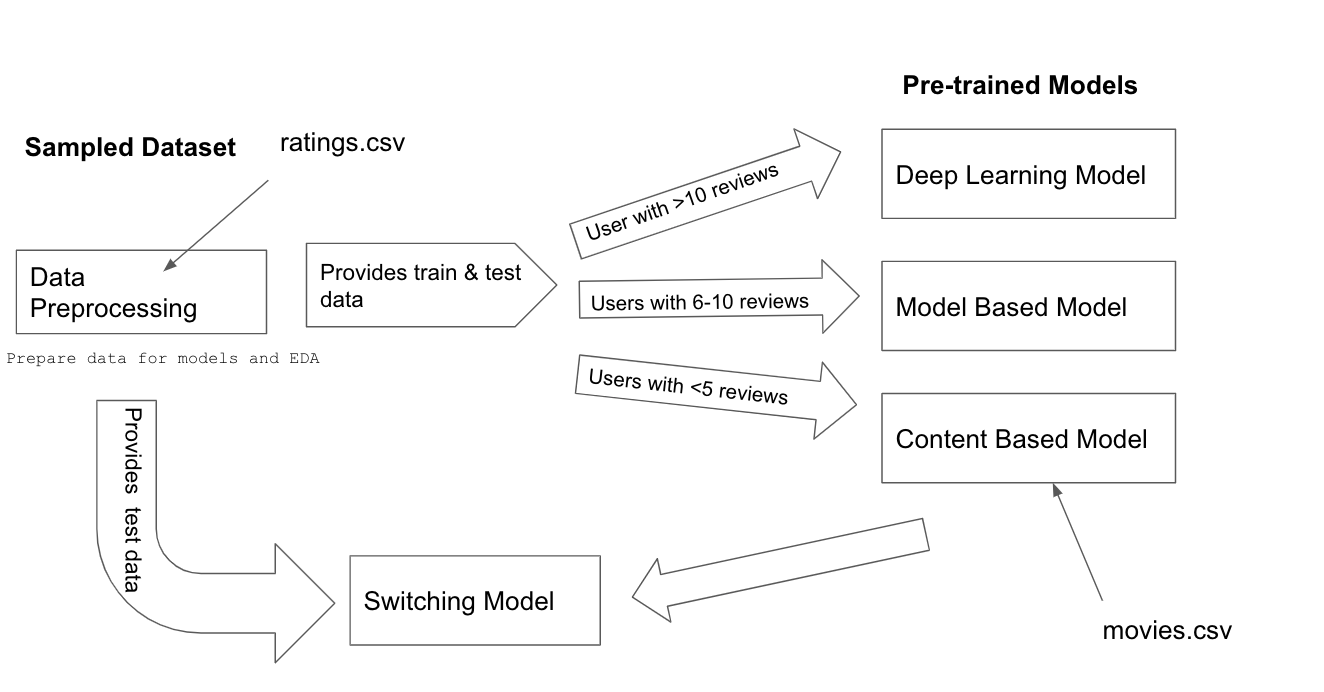

### Target Users

Our system is intended to target all users. The criteria we designed in the switching model handle the new-user cold start problem. By prior rating information and interaction of existing users, content-based and model-based algorithms give useful recommendations. Deep learning model is able to capture the non-linear user-item relationships, so it is a stragety for users with lots of ratings and information.
In addition, we believe that relatively active users are more likely to stay in our platform for a long term, and thus, to maintain a stable subscription revenue, it is important to keep them engaged.


## Report Structure

The main report, including business objectives, model description, model comparison, and final conclusion, can be found in the `Hybrid Model.ipynb` file. Data preparation and sampling can be found in `DataPreparation.ipynb`. Single Model explanatoin and tuning can be found in notesbooks named by the models (`ContentBased.ipynb`, `DL.ipynb`, `MF.ipynb`).

 For the ease of rebuilding the environment we used, we also included Notebook links below:

- Main Report and Hybrid Model
  - Link: https://colab.research.google.com/drive/1LKuJoyNW42HE80G2rVTkdNI3AgojzeB3?usp=sharing

- Matrix Factorization Model and Baseline Model
  - Link: https://colab.research.google.com/drive/1U5yt_IuVVl5CJmZtzObqbaZSCMOWdl2l?usp=sharing

- Content-based Model
  - Link: https://colab.research.google.com/drive/1473nhLVUojLyzlXNbRBieIq6APGl7O3p?usp=sharing

- Deep Learning Model
  - Link: https://colab.research.google.com/drive/1LsxuLngPmVNLclJrl4Vzsub3UY12FhPK?usp=sharing

- Data Preparation
  - Link: https://colab.research.google.com/drive/1RWPTFawW680AS-Wr0lCGgKLV8rMjOATt?usp=sharing


## Import Modules and Libraries



In [ ]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import math 
import matplotlib.pyplot as plt
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import mean_squared_error

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras import utils
from tensorflow.keras.layers import Input, Reshape, Dot, Add, Activation, Lambda, Concatenate, Dense, Dropout, Embedding
from tensorflow.keras.models import Model, Sequential


### Mount to project folder

In [ ]:
!pip install import-ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=0cf005e6ec80b852780ace699f229d89920137bdbd14d0a07b8f16d5a68b2d9b
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [ ]:
!pip install pyspark

     |████████████████████████████████| 204.2MB 77kB/s 
     |████████████████████████████████| 204kB 43.5MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612242 sha256=d4fc429b24ff00c9804481c43bb94adddfdce17ce16663e663990f8f6126e8fd
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


In [ ]:
import import_ipynb

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd "drive/MyDrive/4571/final"

/content/drive/MyDrive/Chelsea/F20/4571/final


### Import Deep Learning Model

Prerequisites: 
- ratings.csv
- User Id

Output:

In [ ]:
from dlModel import dl_train as DLTrain
from dlModel import recommend_single_user as DLPredict

### Import Model Based Model

Prerequisites: 
- ratings.csv
- User Id

Output:

In [ ]:
from modelBased import MF as MBTrain
from modelBased import recommend_single_user as MBPredict

### Import Content Based Model

Prerequisites: 
- ratings.csv
- movies.csv
- User Id

Output:

In [ ]:
from contentBased import content_based_train as CBTrain
from contentBased import recommend_single_user as CBPredict

### Import Data

Data Format

> We split test data into three subsets based on the number of times user rated a movie. 


In [ ]:
train_data = pd.read_csv('train.csv')

test_data_dl = pd.read_csv('test_for_dp.csv')
test_data_cb = pd.read_csv('test_for_content.csv')
test_data_mb = pd.read_csv('test_for_mf.csv')

# merge test cases in all

merged_test = pd.concat([test_data_dl,test_data_cb,test_data_mb])
merged_all = pd.concat([train_data,merged_test])

In [ ]:
movies_df = pd.read_csv('ml-latest/movies.csv', sep=',', header=0)
ratings_df = pd.read_csv('/content/drive/MyDrive/4571/final/ml-latest/ratings.csv', sep=',', header=0)

In [ ]:
dl_train_set = train_data.loc[:100,["userId","movieId","rating"]]
dl_small_test = test_data_dl.loc[:100,["userId","movieId","rating"]]

mf_small = train_data.loc[:100,["userId","movieId","rating"]]
mf_small_test = test_data_mb.loc[:10,["userId","movieId","rating"]]


cb_small_test = test_data_cb.loc[:10,["userId","movieId","rating"]]

Pre-trained Models

In [ ]:
N = 10

In [ ]:
#MBPreTrained = MBTrain(train_data,test_data_mb,N)
MBPreTrained = pd.read_csv("MFRecommendation.csv")

In [ ]:
#DLPreTrained = DLTrain(train_data,test_data_dl,N)
DLPreTrained = pd.read_csv("DL_recommend_df.csv")

In [ ]:
#CBPreTrained = CBTrain(train_data,test_data_cb,N)
CBPreTrained = pd.read_csv("content_based_recommend_df.csv")

In [ ]:
CBPreTrained.head()

,Unnamed: 0,userId,Recommendation
0,0,192204,"[(19, 3.274809658077717), (104, 3.274809658077..."
1,1,106028,"[(5437, 3.0181363277864626), (96655, 2.9940935..."
2,2,57185,"[(1127, 3.9167992851047346), (1129, 3.91679928..."
3,3,281856,"[(44, 3.4448907140952736), (393, 3.44489071409..."
4,4,134816,"[(322, 4.093967012499448), (516, 4.09396701249..."


## EDA

In [ ]:
train_data.groupby('userId').size().sort_values().describe()

count    20000.000000
mean        35.889000
std         35.489664
min          3.000000
25%         16.000000
50%         24.000000
75%         41.000000
max        560.000000
dtype: float64

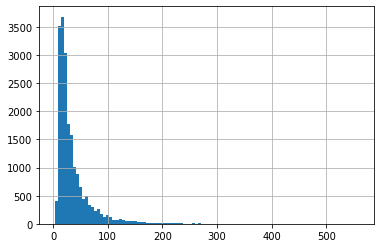

In [ ]:
# Number of ratings each user have
train_data.groupby('userId').size().sort_values().hist(bins=100)

In [ ]:
train_data.groupby('movieId').size().sort_values().describe()

count    1000.000000
mean      717.780000
std      1122.468998
min        74.000000
25%       146.750000
50%       292.000000
75%       753.500000
max      9430.000000
dtype: float64

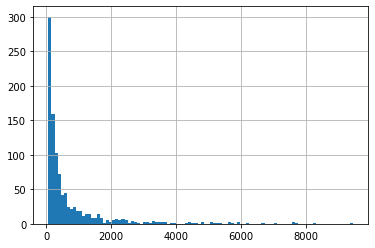

In [ ]:
# Number of ratings each movie have
train_data.groupby('movieId').size().sort_values().hist(bins=100)

## Hybrid Recommendation Model

In [ ]:
# Switching Hybrid Recommendation Model
class HybridRecommendation:
  def __init__(self, userId, records, dl_treshold=11, mb_treshold=6, 
               CBPreTrained=CBPreTrained, MBPreTrained=MBPreTrained, DLPredict=DLPredict
               ):
    ### Inputs:
    # UserId: Id of the user to predict
    # Records: A dataframe of existing records
    # dl_threshold: Hyperparameter bound for using DL funnel
    # mb_threshold: Hyperparameter bound for using ModelBased funnel, 
    #              if lower than this, use ContentBased Model

    self.userId = userId
    self.records = records # TODO: determine input data type/format
    
    self.dl_treshold = dl_treshold
    self. mb_treshold =  mb_treshold

    self.funnel = self.__selectFunnel()
    # print(self.funnel)

   
  def __selectFunnel(self):

    # edge case if user is new
    if self.userId not in self.records["userId"]: return 2
    # calculate the number of ratings the user has
    # print(self.records[["userId",'rating']].groupby("userId").agg(['count']))
    user_rate_count = self.records[["userId",'rating']].groupby("userId").agg(['count']).loc[self.userId]
    user_rate_count = user_rate_count.iloc[0]
    
    # print("User Rating Count:",user_rate_count)

    # if user has > dl_treshold number of ratings, DL model
    if user_rate_count > self.dl_treshold:
      return 0
    # if user has > mb_treshold number of ratings, ModelBased model
    elif user_rate_count > self.mb_treshold:
      return 1
    # if user has only a few ratings, ContentBased
    return 2
  
  def getTopN(self,N):

    if self.funnel == 0:
      res = DLPredict(DLPreTrained, N, self.userId)
      if res == []:
        return MBPredict(MBPreTrained,self.userId, N)
      return res
    elif self.funnel == 1:
      return MBPredict(MBPreTrained,self.userId, N)
    else:
      res = CBPredict(CBPreTrained, N, self.userId) 
      if res == []:
        self.funnel = 1
        return MBPredict(MBPreTrained,self.userId, N)
      return res


In [ ]:
def merge(test_data, top_n, ratings_df):
  ### Inputs:
    # test_data: test data set
    # top_n: top n recommendation for a user
    # ratings_df: ratings data set
  ### Outputs:
    # evaluation_df
    # An dataframe with columns : userId, recommend movieId, predict rating, actual rating
    # For each user in the test data, run the trained model and
    # predict the rating for movies and output the top_n movies with predict ratings
    # Merge with ratings dataframe on movieId and userId
    
  cnt = 0
  evaluation_df = pd.DataFrame(data = None, columns = ['userId', 'movieId','Predict_Rating']) 
  # top_n = 10
  for userId in test_data.userId.unique():
    user = HybridRecommendation(userId, train_data)
    cnt += 1
    if cnt % 200 == 0:
      print("total test", cnt)
    try:
      recommend_list = '['+ user.getTopN(top_n)[0][2:-2] + ']'
      recommend_list = recommend_list.strip('][').split('), (') 
      for info in recommend_list:
        info = info.split(",")
        movieId= int(info[0])
        pred_rating = float(info[1])
        new_row = {'userId': userId, 'movieId': movieId, 'Predict_Rating': pred_rating}
        evaluation_df = evaluation_df.append(new_row, ignore_index=True)
    except:
      recommend_list = user.getTopN(top_n)
      for info in recommend_list:
        movieId= info[0]
        pred_rating = info[1]
        new_row = {'userId': userId, 'movieId': movieId, 'Predict_Rating': pred_rating}
        evaluation_df = evaluation_df.append(new_row, ignore_index=True)
  evaluation_df = pd.merge(evaluation_df, ratings_df, how='left', on=['userId', 'movieId'])
  return evaluation_df

In [ ]:
hybrid_evaluation_df = merge(merged_test, 10, ratings_df)
hybrid_evaluation_df.to_csv("/content/drive/MyDrive/4571/final/hybrid_evaluation_df.csv")

### Deep Learning Recommendation Model

In [ ]:
# Switching Deep Learning Recomendation Model
class DLRecommendation:
  def __init__(self, userId, records, dl_threshold=11, mb_threshold=6, 
               CBPreTrained=CBPreTrained, MBPreTrained=MBPreTrained, DLPredict=DLPredict
               ):
    ### Inputs:
    # UserId: Id of the user to predict

    self.userId = userId

  def getTopN(self,N):
    return DLPredict(DLPreTrained, N, self.userId)

In [ ]:
def DL_merge(test_data, top_n, ratings_df):
  # comment later
  cnt = 0
  evaluation_df = pd.DataFrame(data = None, columns = ['userId', 'movieId','Predict_Rating']) 
  # top_n = 10
  for userId in test_data.userId.unique():
    user = DLRecommendation(userId, train_data)
    cnt += 1
    if cnt % 200 == 0:
      print("total test", cnt)
    try:
      recommend_list = '['+ user.getTopN(top_n)[0][2:-2] + ']'
      recommend_list = recommend_list.strip('][').split('), (') 
      for info in recommend_list:
        info = info.split(",")
        movieId= int(info[0])
        pred_rating = float(info[1])
        new_row = {'userId': userId, 'movieId': movieId, 'Predict_Rating': pred_rating}
        evaluation_df = evaluation_df.append(new_row, ignore_index=True)
    except:
      recommend_list = user.getTopN(top_n)
      for info in recommend_list:
        movieId= info[0]
        pred_rating = info[1]
        new_row = {'userId': userId, 'movieId': movieId, 'Predict_Rating': pred_rating}
        evaluation_df = evaluation_df.append(new_row, ignore_index=True)
  evaluation_df = pd.merge(evaluation_df, ratings_df, how='left', on=['userId', 'movieId'])
  return evaluation_df

In [ ]:
dl_evaluation_df = DL_merge(merged_test, 10, ratings_df)
dl_evaluation_df.to_csv("/content/drive/MyDrive/4571/final/dl_evaluation_df.csv")

### Content Based Recommendation Model

In [ ]:
# Switching Content Based Recomendation Model
class CBRecommendation:
  def __init__(self, userId, records, dl_threshold=11, mb_threshold=6, 
               CBPreTrained=CBPreTrained, MBPreTrained=MBPreTrained, DLPredict=DLPredict
               ):
    ### Inputs:
    # UserId: Id of the user to predict
    self.userId = userId
   
  def getTopN(self,N):
    return CBPredict(CBPreTrained, N, self.userId)


In [ ]:
def CB_merge(test_data, top_n, ratings_df):
  # comment later
  cnt = 0
  evaluation_df = pd.DataFrame(data = None, columns = ['userId', 'movieId','Predict_Rating']) 
  # top_n = 10
  for userId in test_data.userId.unique():
    user = CBRecommendation(userId, train_data)
    cnt += 1
    if cnt % 200 == 0:
      print("total test", cnt)
    try:
      recommend_list = '['+ user.getTopN(top_n)[0][2:-2] + ']'
      recommend_list = recommend_list.strip('][').split('), (') 
      for info in recommend_list:
        info = info.split(",")
        movieId= int(info[0])
        pred_rating = float(info[1])
        new_row = {'userId': userId, 'movieId': movieId, 'Predict_Rating': pred_rating}
        evaluation_df = evaluation_df.append(new_row, ignore_index=True)
    except:
      recommend_list = user.getTopN(top_n)
      for info in recommend_list:
        movieId= info[0]
        pred_rating = info[1]
        new_row = {'userId': userId, 'movieId': movieId, 'Predict_Rating': pred_rating}
        evaluation_df = evaluation_df.append(new_row, ignore_index=True)
  evaluation_df = pd.merge(evaluation_df, ratings_df, how='left', on=['userId', 'movieId'])
  return evaluation_df

In [ ]:
cb_evaluation_df = CB_merge(merged_test, 10, ratings_df)
cb_evaluation_df.to_csv("/content/drive/MyDrive/4571/final/cb_evaluation_df.csv")

### Model Based Recommendation Model

In [ ]:
# Switching Model Based Recomendation Model
class MBRecommendation:
  def __init__(self, userId, records, dl_threshold=11, mb_threshold=6, 
               CBPreTrained=CBPreTrained, MBPreTrained=MBPreTrained, DLPredict=DLPredict
               ):
    ### Inputs:
    # UserId: Id of the user to predict
    # Records: A dataframe of existing records
    # dl_treshold: Hyperparameter bound for using DL funnel
    # mb_treshold: Hyperparameter bound for using ModelBased funnel, 
    #              if lower than this, use ContentBased Model

    self.userId = userId
   
  def getTopN(self,N):
    return MBPredict(MBPreTrained,self.userId, N)

In [ ]:
def MB_merge(test_data, top_n, ratings_df):
  # comment later
  cnt = 0
  evaluation_df = pd.DataFrame(data = None, columns = ['userId', 'movieId','Predict_Rating']) 
  # top_n = 10
  for userId in test_data.userId.unique():
    user = MBRecommendation(userId, train_data)
    cnt += 1
    if cnt % 200 == 0:
      print("total test", cnt)
    try:
      recommend_list = '['+ user.getTopN(top_n)[0][2:-2] + ']'
      recommend_list = recommend_list.strip('][').split('), (') 
      for info in recommend_list:
        info = info.split(",")
        movieId= int(info[0])
        pred_rating = float(info[1])
        new_row = {'userId': userId, 'movieId': movieId, 'Predict_Rating': pred_rating}
        evaluation_df = evaluation_df.append(new_row, ignore_index=True)
    except:
      recommend_list = user.getTopN(top_n)
      for info in recommend_list:
        movieId= info[0]
        pred_rating = info[1]
        new_row = {'userId': userId, 'movieId': movieId, 'Predict_Rating': pred_rating}
        evaluation_df = evaluation_df.append(new_row, ignore_index=True)
  evaluation_df = pd.merge(evaluation_df, ratings_df, how='left', on=['userId', 'movieId'])
  return evaluation_df

In [ ]:
mb_evaluation_df = MB_merge(merged_test, 10, ratings_df)
mb_evaluation_df.to_csv("/content/drive/MyDrive/4571/final/mb_evaluation_df.csv")

### Baseline Model

For basedline model, we just simply give recommendation to users by giving high rating movies. As different users will indeed have different preference to movies, we regard this baseline model as a biased model. 

# Metrics

1.   RMSE
2.   Precision
3.   Recall
4.   Coverage 
5.   Novelty


In [ ]:
dl_evaluation_df = pd.read_csv('/content/drive/MyDrive/4571/final/dl_evaluation_df.csv')
cb_evaluation_df = pd.read_csv('/content/drive/MyDrive/4571/final/cb_evaluation_df.csv')
mb_evaluation_df = pd.read_csv('/content/drive/MyDrive/4571/final/mb_evaluation_df.csv')
hybrid_evaluation_df = pd.read_csv('/content/drive/MyDrive/4571/final/hybrid_evaluation_df.csv')

#### RMSE

RMSE will also be reported which is only relevant for collaborative filtering with latent factor models (as it attempts to reconstruct ratings and uses it as it cost function during optimization).

<br>

$$ RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_i - \hat y_i )^2} $$

<br>

#### Precision@k

Precision at k is a measure of how many of the first k recommended documents are in the set of true relevant documents averaged across all users. In this metric, the order of the recommendations is not taken into account.
<br>

$$ p(k) = \frac{1}{M} \sum_{i=0}^{M-1} \frac{1}{k} \sum_{j=0}^{\min(|D|,k)-1} rel_{D_i}(Z_i(j)) $$


<br>

#### Recall@k

Recall at k is the proportion of relevant items found in the top-k recommendations
Suppose that we computed recall at 10 and found it is 40% in our top-10 recommendation system. This means that 40% of the total number of the relevant items appear in the top-k results.

Recall@k = (# of recommended items @k that are relevant) / (total # of relevant items)

#### Coverage

Measures the percentage of movies that are recommended for at the bare minimum one user. Essentially, it tells you how many items of the entire movie catalog are actually recommended to our $m$ users by the algorithm. There is a trade-off between between generating relevant recommendations and covering most of the available pool of items.

<br>

$$ CC = \frac{|\cup_{u=1}^m T_u|}{n} $$

<br>

#### Novelty

It takes into consideration “How popular are the items you are recommending”. Popular items are popular for a reason and hence are good for the recommendation. But there is a challenge to it — User Trust.
People need to see things that they are familiar with to believe those good recommendations are made by the Recommendation System. Otherwise, he may think that the recommendation system is bad and don’t engage with it or worse, may make fun of it in social media.

In [ ]:
def precision_k(test_data, k, evaluation_df):
  sum_precision = 0
  valid_test_num = 0
  for userId in test_data.userId.unique():
    small_eval = evaluation_df[evaluation_df['userId'] == userId]
    if len(small_eval) != 0:
      # print(small_eval)
      valid_test_num += 1
      relevant_items = small_eval.loc[small_eval['rating'] >= 3.5]['movieId'].values.tolist()
      # print(relevant_items)
      predict_items = small_eval.sort_values(by=['Predict_Rating'], ascending = False)[:k]['movieId'].values.tolist()
      # print(predict_items)
      try:
        overlap = list(set(relevant_items) & set(predict_items)) 
        precision_k = len(overlap)/len(predict_items)
      except:
        precison_k = 0
      sum_precision += precision_k
  print(valid_test_num)
  return sum_precision/valid_test_num

In [ ]:
def recall_k(test_data, k, evaluation_df):
  # test_data = test_data[:2]
  sum_recall = 0
  valid_test_num = 0
  for userId in test_data.userId.unique():
    # print(userId)
    small_eval = evaluation_df[evaluation_df['userId'] == userId]
    if len(small_eval) != 0:
      # print(small_eval)
      valid_test_num += 1
      relevant_items = small_eval.loc[small_eval['rating'] >= 3.5]['movieId'].values.tolist()
      # print(relevant_items)
      predict_items = small_eval.sort_values(by=['Predict_Rating'], ascending = False)[:k]['movieId'].values.tolist()
      # print(predict_items)
      try:
        overlap = list(set(relevant_items) & set(predict_items)) 
        recall_k = len(overlap)/len(relevant_items)
      except:
        recall_k = 0
      sum_recall += recall_k
  print(valid_test_num)
  return sum_recall/valid_test_num

In [ ]:
def Catalog_Coverage(evaluation, top_k=100):
  evaluation['recommendation'] = list(zip(evaluation.movieId, evaluation.Predict_Rating))
  total_num_of_items = evaluation.movieId.nunique()
  recommendation = evaluation.groupby('userId')['recommendation'].apply(lambda group_series: group_series.tolist())
  total_set = set([])
  for userId, user_lst in recommendation.items():
    item_lst = [i[0] for i in user_lst][:top_k]
    total_set.update(item_lst)
  return len(total_set)/total_num_of_items

In [ ]:
def Novelty_Score(evaluation, num_of_popular=50, top_k=10):
  popular_set = set(evaluation.groupby('movieId').size().sort_values(ascending=False).iloc[:num_of_popular].index)
  
  evaluation['recommendation'] = list(zip(evaluation.movieId, evaluation.Predict_Rating))
  total_num_of_items = evaluation.movieId.nunique()
  recommendation = evaluation.groupby('userId')['recommendation'].apply(lambda group_series: group_series.tolist())
  
  count = 0 
  for userId, user_lst in recommendation.items():
    j = 0
    for pair in user_lst:
      if pair[0] not in popular_set:
        count += 1
      j += 1
      if j >= top_k: break  

  # novelty = total_number_of_unpopular_movie_in_top_k / total_number_of_movies_in_top_k
  return count / (len(recommendation)*top_k)

In [ ]:
#Catalog Coverage
Coverage = []
for i in range(1, 10):
    dl = Catalog_Coverage(dl_evaluation_df, top_k=i)
    cb = Catalog_Coverage(cb_evaluation_df, top_k=i)
    mb = Catalog_Coverage(mb_evaluation_df, top_k=i)
    hybrid = Catalog_Coverage(hybrid_evaluation_df, top_k=i)
    Coverage.append([dl, cb, mb, hybrid])

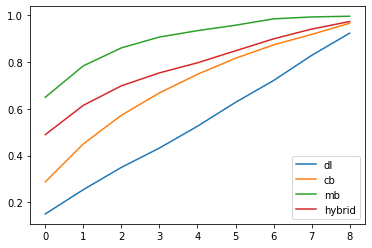

In [ ]:
pd.DataFrame(np.array(Coverage), columns= ['dl', 'cb', 'mb', 'hybrid']).plot.line()

In [ ]:
#Novelty Score
Novelty = []
for i in range(1, 10):
    dl = Novelty_Score(dl_evaluation_df, num_of_popular=50, top_k=i)
    cb = Novelty_Score(cb_evaluation_df, num_of_popular=50, top_k=i)
    mb = Novelty_Score(mb_evaluation_df, num_of_popular=50, top_k=i)
    hybrid = Novelty_Score(hybrid_evaluation_df, num_of_popular=50, top_k=i)
    Novelty.append([dl, cb, mb, hybrid])

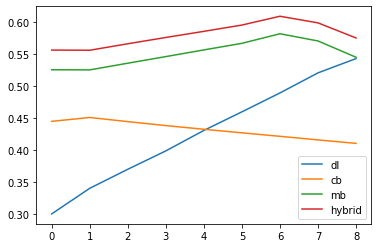

In [ ]:
pd.DataFrame(np.array(Novelty), columns= ['dl', 'cb', 'mb', 'hybrid']).plot.line()

In [ ]:
hybrid_evaluation_df.head()

,Unnamed: 0,userId,movieId,Predict_Rating,rating,timestamp
0,0,1931.0,471.0,3.464583,NaN,NaN
1,1,1931.0,155.0,3.439289,NaN,NaN
2,2,1931.0,138.0,3.417915,NaN,NaN
3,3,1931.0,472.0,3.406760,NaN,NaN
4,4,1931.0,823.0,3.402347,NaN,NaN


In [ ]:
hybrid_precision_k = precision_k(merged_test, 5, hybrid_evaluation_df)
hybrid_recall_k = recall_k(merged_test, 5, hybrid_evaluation_df)
hybrid_rmse = np.power(np.power(hybrid_evaluation_df['Predict_Rating'] - hybrid_evaluation_df['rating'],2).mean(),0.5)

In [ ]:
dl_precision_k = precision_k(merged_test, 5, dl_evaluation_df)
dl_recall_k = recall_k(merged_test, 5, dl_evaluation_df)
dl_rmse = np.power(np.power(dl_evaluation_df['Predict_Rating'] - dl_evaluation_df['rating'],2).mean(),0.5)

In [ ]:
cb_precision_k = precision_k(merged_test, 5, cb_evaluation_df)
cb_recall_k = recall_k(merged_test, 5, cb_evaluation_df)
cb_rmse = np.power(np.power(cb_evaluation_df['Predict_Rating'] - cb_evaluation_df['rating'],2).mean(),0.5)

In [ ]:
mb_precision_k = precision_k(merged_test, 5, mb_evaluation_df)
mb_recall_k = recall_k(merged_test, 5, mb_evaluation_df)
mb_rmse = np.power(np.power(mb_evaluation_df['Predict_Rating'] - mb_evaluation_df['rating'],2).mean(),0.5)

## Metrics Summary

Test data set - unique user: 19761

After hybrid model: unique user: 520



| Model         | Valid data point | Valid unique users | rmse   | precision@k=5 | recall@k=5 |
|---------------|------------------|--------------------|--------|---------------|------------|
| Hybrid        | 44645            | 5201               | 0.9432 | 0.6769        | 0.2355     |
| Deep Learning | 3260             | 326                | 1.1408 | 0.0344        | 0.1304     |
| Model Based   | 41562            | 4905               | 0.9405 | 0.7266        | 0.7016     |
| Content Based | 103440           | 10344              | 1.1561 | 0.1360        | 0.4053     |

The performance of baseline on three different datasets(Corresponding to different models).

Dataset Name | RMSE
----- | -----
Data for Deep Learning  Model| 1.44
Data for Content-Based Model | 1.29
Data for Matrix factorization Model | 1.33

KNN

| Model         | Valid data point | Valid unique users | rmse   | precision@100 | recall@100 |
|---------------|------------------|--------------------|--------|---------------|------------|
| KNN* | 73812           | 16487              | 0.9463 | 0.87        | 0.5     |

* Number of k (# of neighbors) is 15.
* Data of KNN is from hw2.
* Due to the difference in training set and metrics, this data is only for reference.

# Distribution of RMSE for each type of users 

To further validate our result, we also looked into the RMSE for each type of users. It is observed that the median of RMSE for each type of users is smaller in the hybrid model, compared to the other models. However, since we switched model by user type, the per movie type RMSE didn't perform very well.

As shown below:

In [ ]:
DL_predres = pd.read_csv("dl_evaluation_df.csv")
del DL_predres["Unnamed: 0"]
DL_predres = DL_predres.dropna()

CB_predres = pd.read_csv("cb_evaluation_df.csv")
del CB_predres["Unnamed: 0"]
CB_predres = CB_predres.dropna()

MB_predres = pd.read_csv("mb_evaluation_df.csv")
del MB_predres["Unnamed: 0"]
MB_predres =MB_predres.dropna()

HB_predres = pd.read_csv('hybrid_evaluation_df.csv')
del HB_predres["Unnamed: 0"]
HB_predres = HB_predres.dropna()

In [ ]:
def RMSEgraph(df, title, type):
  temp = {} # id, count, squar err
  for index, row in df.iterrows():
    if row[type] not in temp:
      temp[row[type]] = {"count":0, "err":0.0}
    temp[row[type]]["count"] += 1
    temp[row[type]]["err"] += (row["Predict_Rating"] - row["rating"]) ** 2

  rmse = []
  for user in temp:
    rmse.append(math.sqrt(temp[user]["err"]/temp[user]["count"]))
  plt.hist(rmse, bins = 10)
  plt.xlabel("RMSE")
  plt.ylabel("Frequency")
  plt.title(title)
  plt.show()

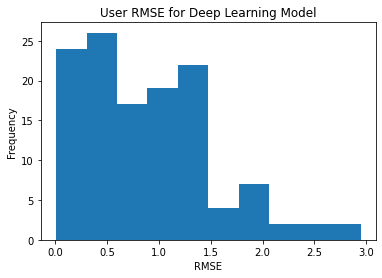

In [ ]:
RMSEgraph(DL_predres, "User RMSE for Deep Learning Model", "userId")

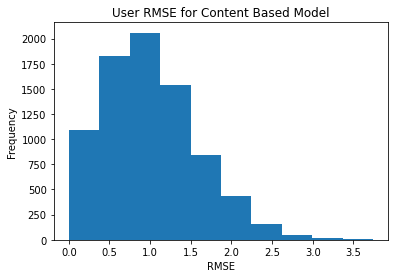

In [ ]:
RMSEgraph(CB_predres, "User RMSE for Content Based Model", "userId")

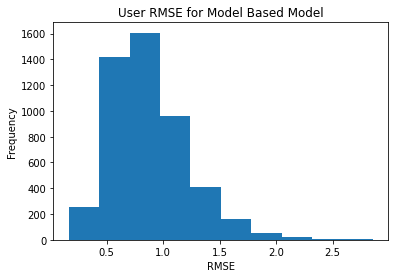

In [ ]:
RMSEgraph(MB_predres, "User RMSE for Model Based Model", "userId")

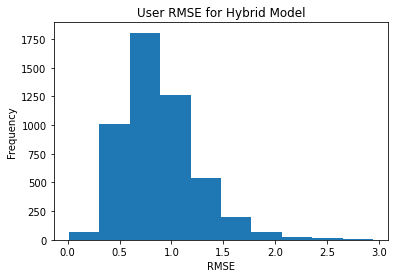

In [ ]:
RMSEgraph(HB_predres, "User RMSE for Hybrid Model", "userId")

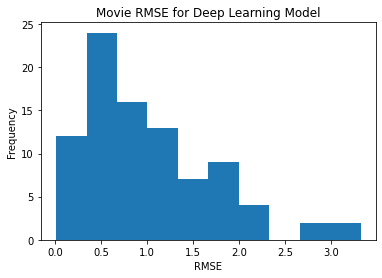

In [ ]:
RMSEgraph(DL_predres, "Movie RMSE for Deep Learning Model", "movieId")

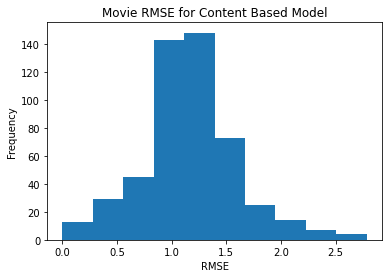

In [ ]:
RMSEgraph(CB_predres, "Movie RMSE for Content Based Model", "movieId")

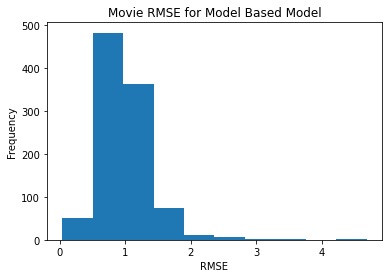

In [ ]:
RMSEgraph(MB_predres, "Movie RMSE for Model Based Model", "movieId")

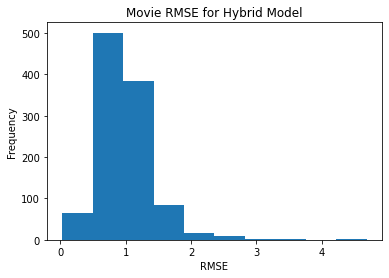

In [ ]:
RMSEgraph(HB_predres, "Movie RMSE for Hybrid Model", "movieId")

# Final Recommendation/ Improvements
After giving recommendation based on Baseline Model (most popular movies), MF, Deep Learning, Content-Based model, and compare the performance of those single methods with the performance of the model we creatively built - hybrid model (based on switching users), we can find that the hybrid model not only can provide more accurate result, but also more computational effective. We can consider to put this hybrid model into production in the future.

So far, we met our objective of recommending users the most relevant movies by implementing a hybrid model, which is the effective solution for building a production-quality recommender system. 
* Handles user cold-start problem
* Gives a level of sensitivity to the strengths and weaknesses of all combined recommenders

There are several ways to improve the performance:
1. Switching criteria

  a.  Bring the complexity of tuning funnel threshold. 

According to the EDA, there are 25% users rated fewer than 6 movies, 50% users rated fewer than 10 movies.Due to a limited computation power, we preliminarily decide the funnel threshold based on distribution of number of ratings per user. 

2. Constituent recommenders 

  a. Deep learning models could be improved by adopting more comprehensive modalities as embedding layers(e.g. tags, movies information, user reviews) Use wide and deep networks to learning more complex embeddings. Add time sensitivity to the model by using sequential techniques like LSTM.
